In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
data=pd.read_csv("data.csv")
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [4]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)

SVC(random_state=1)

score:  0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



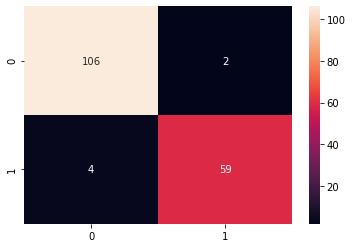

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
print("score: ",svm.score(x_test,y_test))
prediction = svm.predict(x_test)
cm = confusion_matrix(y_test,prediction)
print(classification_report(y_test, prediction))
sns.heatmap(cm,annot=True,fmt="d") 